<a href="https://colab.research.google.com/github/Neetu24/Parkinson-Disease-Prediction/blob/main/Parkinson_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 First 5 rows of the dataset:
   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589           

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


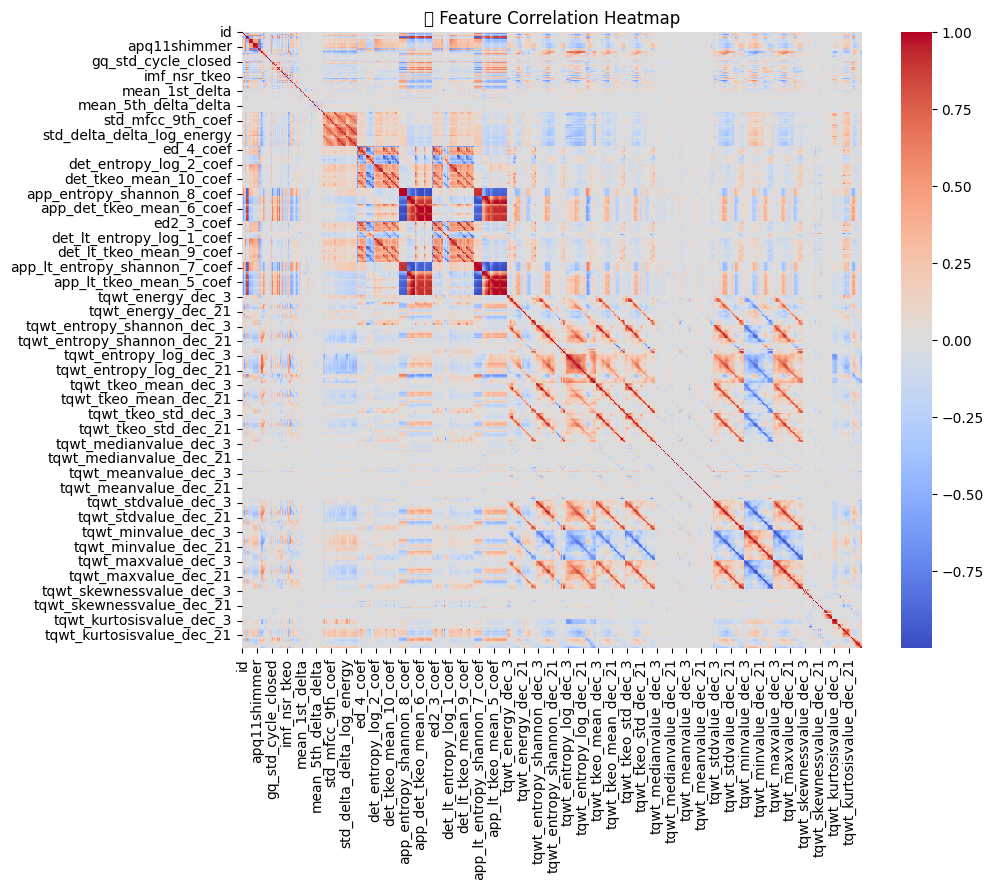


📌 Logistic Regression
Confusion Matrix:
 [[108   1]
 [ 20  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       109
           1       0.99      0.83      0.90       117

    accuracy                           0.91       226
   macro avg       0.92      0.91      0.91       226
weighted avg       0.92      0.91      0.91       226

ROC-AUC Score: 0.9610287775425389

📌 Random Forest
Confusion Matrix:
 [[108   1]
 [ 10 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       109
           1       0.99      0.91      0.95       117

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226

ROC-AUC Score: 0.998353328628558

📌 SVM
Confusion Matrix:
 [[106   3]
 [ 11 106]]
Classification Report:
               precision    recall 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:16:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 XGBoost
Confusion Matrix:
 [[107   2]
 [  9 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       109
           1       0.98      0.92      0.95       117

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226

ROC-AUC Score: 0.9963145926448679


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


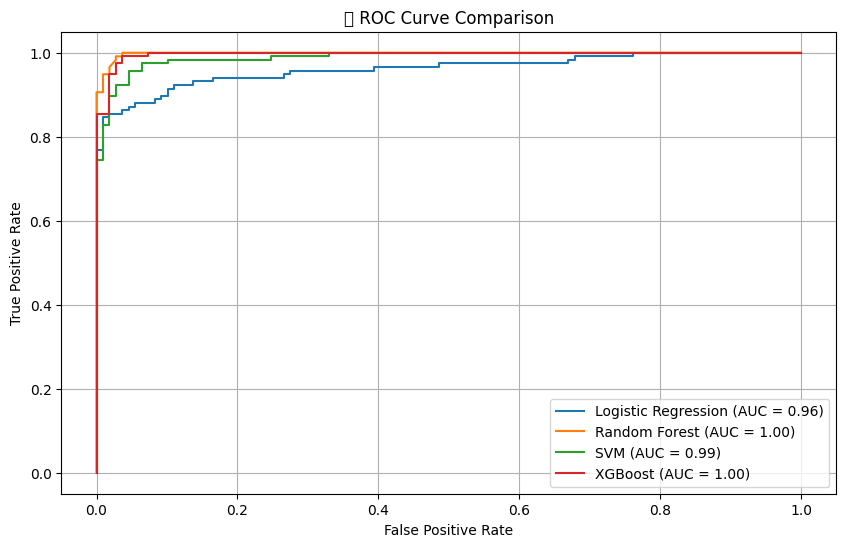


🔍 Sample Test Prediction: Healthy


In [ ]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# 2. Load Dataset
df = pd.read_csv('/content/parkinson_disease.csv')
print("🔹 First 5 rows of the dataset:")
print(df.head())

# 3. Drop non-feature columns (e.g., 'name')
if 'name' in df.columns:
    df.drop(['name'], axis=1, inplace=True)

# 4. Check for missing values
print("\n🔹 Missing values in each column:")
print(df.isnull().sum())

# 5. Convert all column names to lowercase for consistency
df.columns = [col.lower() for col in df.columns]
print("\n🔹 Available columns after lowercase conversion:")
print(df.columns.tolist())

# 6. Define Features (X) and Labels (y)
label_col = None
for col in ['status', 'target', 'class', 'label']:
    if col in df.columns:
        label_col = col
        break

if label_col is None:
    raise ValueError("❌ Label column not found. Available columns are: " + str(df.columns.tolist()))

y = df[label_col]
X = df.drop([label_col], axis=1)

# 7. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 8. Handle Imbalanced Dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 10. Exploratory Data Analysis — Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_resampled.corr(), cmap='coolwarm', annot=False)
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

# 11. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 12. Train and Evaluate Models
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n📌 {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

# 13. Plot ROC Curve
plt.title('📈 ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# 14. Test Prediction on New Sample
sample = X_test.iloc[0].values.reshape(1, -1)
best_model = models["XGBoost"]
prediction = best_model.predict(sample)

print("\n🔍 Sample Test Prediction:", "Parkinson's" if prediction[0] == 1 else "Healthy")
